# Create Date Filters in UTC

As we confirmed that the time-stamps of the QPESUMS dataset is in UTC, we need to re-create all time-filters in UTC.

## Creating List

Here we use the tolls above to create a few lists of dates:

- by Precipitation threshold

  -  1 mm/hr
  -  5 mm/hr
  - 10 mm/hr
  - 20 mm/hr
  - 40 mm/hr

- by Typhoon events

We need to use the precipitation data (`data/t1hr.csv`) and the typhoon records (`data/2013-2016_TYW.xlsx`) to perform this task.

### List by Precipitation Amount

We first read in the precipitation of each station, and then use the maximal precipitation at each time stamp.

    timestamp  466880  466900  466910  466920  466930  466940  466950  C0A520  \
0  2013010100     NaN     0.0     0.0     NaN     0.0     NaN     0.0     0.0   
1  2013010101     NaN     0.0     NaN     NaN     0.0     0.5     0.0     0.0   
2  2013010102     NaN     0.0     NaN     0.5     NaN     1.0     0.0     0.0   
3  2013010103     NaN     0.0     0.5     NaN     0.5     0.5     0.0     0.5   
4  2013010104     1.5     0.0     1.5     1.5     0.5     1.0     0.1     0.5   

   C0A530  ...  C0ACA0  C0AD00  C0AD10  C0AD20  C0AD30  C0AD40  C0AD50  \
0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.5  ...     0.5     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.5  ...     0.0     0.0     0.0     0.5     0.0     0.5     0.0   
4     1.0  ...     1.0     0.0     0.0     1.0     0.5     1.0     0.5   

   C0AG90  C0AH00  C0AH10  
0     0.0     0.0     NaN  
1     0.0   

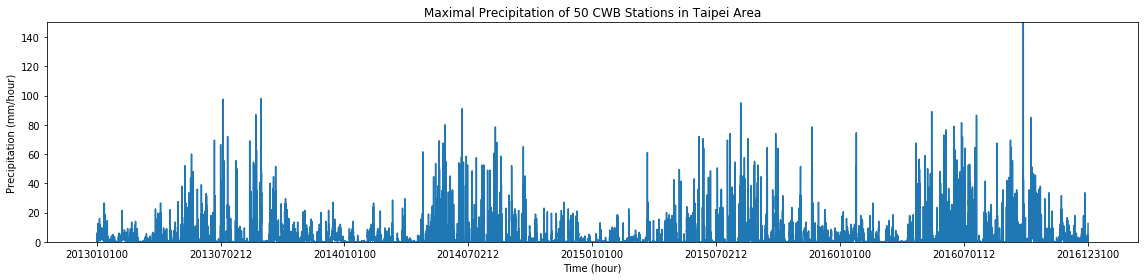

In [7]:
import numpy as np
import pandas as pd

# Read data
tmp = pd.read_csv('./data/t1hr_utc.csv')
print(tmp.head())
# Move date to index
dates = tmp['timestamp']
t1hr = tmp.iloc[:,1:]
print(t1hr.shape)
# Max of stations
t1hr_max = t1hr.max(axis=1)

# Making plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.plot(t1hr_max)
plt.xticks(np.arange(0, len(t1hr_max), 4380), list(dates[np.arange(0, len(t1hr_max), 4380)]))
plt.ylim(0,150)
plt.xlabel('Time (hour)')
plt.ylabel('Precipitation (mm/hour)')
plt.title('Maximal Precipitation of 50 CWB Stations in Taipei Area')
plt.tight_layout()
plt.show()

In [8]:
# Create date list
p01 = dates[t1hr_max>=1.]
p05 = dates[t1hr_max>=5.]
p10 = dates[t1hr_max>=10.]
p20 = dates[t1hr_max>=20.]
p40 = dates[t1hr_max>=40.]

# Show some basic statistics
print(len(dates))
print(len(p01))
print(len(p05))
print(len(p10))
print(len(p20))
print(len(p40))

35057
11800
4775
2303
913
249


In [9]:
# Output the lists
p01.to_csv('data/dates_p01_utc.csv', header=True, index=False)
p05.to_csv('data/dates_p05_utc.csv', header=True, index=False)
p10.to_csv('data/dates_p10_utc.csv', header=True, index=False)
p20.to_csv('data/dates_p20_utc.csv', header=True, index=False)
p40.to_csv('data/dates_p40_utc.csv', header=True, index=False)

In [ ]:
# Read in Typhoon warning data
tyw = pd.read_excel('data/2013-2016_TYW.xlsx')

# Align the Typhoon warning time stamp with the precipitation
t1=[]
t2=[]

# Loop through each typhoon
for i in range(tyw.shape[0]):
    ty = tyw.iloc[i,:]
    # Create time-stamp strings in YYYYMMDDHH
    d1 = ty['start_date'].strftime('%Y%m%d')+'01'
    d2 = ty['end_date'].strftime('%Y%m%d')+'24'
    # Find the index of the date range
    t1.append(list(dates).index(int(d1)))
    t2.append(list(dates).index(int(d2)))

tyw['start_idx'] = t1
tyw['end_idx'] = t2

tyw